### Imports

In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

## Part A-
### Modelling
* [7 points] Explain how you would model this navigation problem as a Markov decision process. In particular, describe:

- (a) [1 points] What are the state and action spaces?
    _The state space encompsses each of the blank cells in gridworld, namely {s11, s13*, s14, s15, s21, s23, s24, s25, s31,s32, s33, s34, s35, s41, s45, s51, s52, s53, s54} with s13 as the terminal state_ 
    _The action space is {U,D,L,R} for an attempted movement up, down, left or right, respectively_ 
    
    
- (b) [2 points] What is the transition probability matrix P? (You may describe just the non-zero entries.)
 *do they want us to describe a 20x20 matrix here?* 
 
 
- (c) [2 points] What is a suitable reward function R that aligns with the goal? (There are many choices, so please choose one and explain your reasoning.)
_High value for the goal, say +25 <-- encourage finding the goal_ 
_Lose point for each time step, say -1  <-- encourage minimizing steps taken to goal (fast)_ 
_(?) high initial value, say 40 for optimistic bias (?)_ 


- (d) [2 points] Write down the discounted Bellman equation V [s] for s the initial state of this MDP. Simplify your answer as much as you can. You do not need to solve it analytically. What do you think is (are) the optimal policy (policies) for this problem, based on the Figure 1 and the system behavior?


### Deterministic Gridworld
* [8 points] Now, you are asked to implement the behavior of the Gridworld environment in a Python file. Create a python file called Gridworld.py and fill in the missing details below:

In [4]:
# Padmanie
class Gridworld:
    
    # States are a pair of row, column coordinates
    
    def initial_state(self):
    # return the initial state of this MDP
        initial_state = [5,1]        # used an array that is mutable (we can update this)
        return initial_state
    
    def states(self):
    # return a list containing all the possible states in this MDP
        states = [(1,1), (1,3), (1,4), (1,5), (2,1), (2,3), (2,4), (2,5), (3,1), (3,2),
                    (3,3), (3,4), (3,5), (4,1), (4,5), (5,1), (5,2), (5,3), (5,4), (5,5)]
        return states
    
    def actions(self):
    # return possible actions
        actions = ['U','D','L','R']
        return actions
    
    def reward(self, state, action, next_state):
    # return R(s, a, s ')    
        if next_state == (1,3) and state != (1,3):
            reward = 25
        else:
            reward = -1
        return reward
        
    def next_state(self, state, action):
        stateSpace = {(1,1):{'U':(1, 1), 'D':(2, 1), 'L':(1, 1), 'R':(1, 1)}, 
                  (1,3):{'U':(1, 3), 'D':(1, 3), 'L':(1, 3), 'R':(1, 3)}, 
                  (1,4):{'U':(1, 4), 'D':(2, 4), 'L':(1, 3), 'R':(1, 5)}, 
                  (1,5):{'U':(1, 5), 'D':(2, 5), 'L':(1, 4), 'R':(1, 5)}, 
                  (2,1):{'U':(1, 1), 'D':(3, 1), 'L':(2, 1), 'R':(2, 1)}, 
                  (2,3):{'U':(1, 3), 'D':(3, 3), 'L':(2, 3), 'R':(2, 4)}, 
                  (2,4):{'U':(1, 4), 'D':(3, 4), 'L':(2, 3), 'R':(2, 5)}, 
                  (2,5):{'U':(1, 5), 'D':(3, 5), 'L':(2, 4), 'R':(2, 5)}, 
                  (3,1):{'U':(2, 1), 'D':(4, 1), 'L':(3, 1), 'R':(3, 2)}, 
                  (3,2):{'U':(3, 2), 'D':(3, 2), 'L':(3, 1), 'R':(3, 3)},
                  (3,3):{'U':(2, 3), 'D':(3, 3), 'L':(3, 2), 'R':(3, 4)}, 
                  (3,4):{'U':(2, 4), 'D':(3, 4), 'L':(3, 3), 'R':(3, 5)}, 
                  (3,5):{'U':(2, 5), 'D':(4, 5), 'L':(3, 4), 'R':(3, 5)}, 
                  (4,1):{'U':(3, 1), 'D':(5, 1), 'L':(4, 1), 'R':(4, 1)}, 
                  (4,5):{'U':(3, 5), 'D':(5, 5), 'L':(4, 5), 'R':(4, 5)}, 
                  (5,1):{'U':(4, 1), 'D':(5, 1), 'L':(5, 1), 'R':(5, 2)}, 
                  (5,2):{'U':(5, 2), 'D':(5, 2), 'L':(5, 1), 'R':(5, 3)}, 
                  (5,3):{'U':(5, 3), 'D':(5, 3), 'L':(5, 2), 'R':(5, 4)}, 
                  (5,4):{'U':(5, 4), 'D':(5, 4), 'L':(5, 3), 'R':(5, 5)},
                  (5,5):{'U':(4, 5), 'D':(5, 5), 'L':(5, 4), 'R':(5, 5)}}
        
        return stateSpace[state][action]
        
    def pr(self, state, action, next_state):
        # return P(s' | s, a)

        #probabilities is a dictionary, referencing each existing state
        # assume if in state (1,3), it will not escape
        probabilities={(1,1):{'U':(1, 1), 'D':(2, 1), 'L':(1, 1), 'R':(1, 1)}, 
                      (1,3):{'U':(1, 3), 'D':(1, 3), 'L':(1, 3), 'R':(1, 3)}, 
                      (1,4):{'U':(1, 4), 'D':(2, 4), 'L':(1, 3), 'R':(1, 5)}, 
                      (1,5):{'U':(1, 5), 'D':(2, 5), 'L':(1, 4), 'R':(1, 5)}, 
                      (2,1):{'U':(1, 1), 'D':(3, 1), 'L':(2, 1), 'R':(2, 1)}, 
                      (2,3):{'U':(1, 3), 'D':(3, 3), 'L':(2, 3), 'R':(2, 4)}, 
                      (2,4):{'U':(1, 4), 'D':(3, 4), 'L':(2, 3), 'R':(2, 5)}, 
                      (2,5):{'U':(1, 5), 'D':(3, 5), 'L':(2, 4), 'R':(2, 5)}, 
                      (3,1):{'U':(2, 1), 'D':(4, 1), 'L':(3, 1), 'R':(3, 2)}, 
                      (3,2):{'U':(3, 2), 'D':(3, 2), 'L':(3, 1), 'R':(3, 3)},
                      (3,3):{'U':(2, 3), 'D':(3, 3), 'L':(3, 2), 'R':(3, 4)}, 
                      (3,4):{'U':(2, 4), 'D':(3, 4), 'L':(3, 3), 'R':(3, 5)}, 
                      (3,5):{'U':(2, 5), 'D':(4, 5), 'L':(3, 4), 'R':(3, 5)}, 
                      (4,1):{'U':(3, 1), 'D':(5, 1), 'L':(4, 1), 'R':(4, 1)}, 
                      (4,5):{'U':(3, 5), 'D':(5, 5), 'L':(4, 5), 'R':(4, 5)}, 
                      (5,1):{'U':(4, 1), 'D':(5, 1), 'L':(5, 1), 'R':(5, 2)}, 
                      (5,2):{'U':(5, 2), 'D':(5, 2), 'L':(5, 1), 'R':(5, 3)}, 
                      (5,3):{'U':(5, 3), 'D':(5, 3), 'L':(5, 2), 'R':(5, 4)}, 
                      (5,4):{'U':(5, 4), 'D':(5, 4), 'L':(5, 3), 'R':(5, 5)},
                      (5,5):{'U':(4, 5), 'D':(5, 5), 'L':(5, 4), 'R':(5, 5)}}
        
        if next_state == probabilities[state][action]:
            prob = 1
        else:
            prob = 0
    
        return prob
    
    def set_p(self, p):
        self.p = p

## Value Iteration
* [15 points] Part B - Solving using Value Iteration: Given the model you obtained in Part I above, the goal now is to solve the corresponding MDP using dynamic programming. The following template has been provided for you in order to make the implementation of value iteration a little easier. You are tasked with programming the initialization and iteration of the algorithm.

In [3]:
k = 0
V = {}
V[k] = {key: 0 for key in Gridworld().states()} # initialize dict with subdict using key = number of letters

#for i in [1,2,3]:
#    V[k] = 0

In [271]:
V[k][1,1]=1

In [272]:
max(V[k].values())

1

In [141]:
V_1 = {
(1, 1):-1.0
,(1, 3):-1.0
,(1, 4):-1.0
,(1, 5):-1.0
,(2, 1):-1.0
,(2, 3):-1.0
,(2, 4):-1.0
}
V_2 = {
(1, 1):0.0
,(1, 3):0.0
,(1, 4):0.0
,(1, 5):0.0
,(2, 1):0.0
,(2, 3):0.0
,(2, 4):0.0
}

In [142]:
v1_df = pd.DataFrame.from_dict(V_1,orient='index')
v2_df = pd.DataFrame.from_dict(V_2,orient='index')

In [5]:
# Nikita
class ValueIteration(object):

    def __init__(self, gridworld, gamma):
        # initialize the domain and discount factor
        self.gridworld = gridworld
        self.gamma = gamma
        self.k = 0 # iteration numbers
        self.V = {}  # value matrix
        self.pi = {}
        self.p = 0
        
    def initialize_values(self):
        # you need to initialize the value function V_0[s] = 0 for all states
        # implement V as a dictionary that maps states to values - this will guarantee constant - time reading and writing
        # initialize states with 0s
        self.V[self.k] = {key: 0.0 for key in self.gridworld.states()} 
        self.pi[self.k] = {key: 0 for key in self.gridworld.states()}
        
    def compute_backup(self, state, action):
        # use this as a helper function to return the necessary quantity 
        # E{R(s, a, S ') + gamma * V_k[S ']} in value iteration 
        next_state = self.gridworld.next_state(state, action)
        V_s = self.V[self.k][next_state]
        p = self.gridworld.pr(state,action,next_state) - self.p       # updated for windy
        R_s = self.gridworld.reward(state, action, next_state)
        backup = p*(R_s + self.gamma*V_s)
        
        if self.p > 0:
            next_state_windy = self.gridworld.next_state(state, 'D')
            V_s_windy = self.V[self.k][next_state]                             #updated for windy
            R_s_windy = self.gridworld.reward(state, 'D', next_state_windy)
            backup = backup + (1-p)*(R_s_windy + self.gamma*V_s_windy)
        
        return backup 

    def greedy_action(self, state):
        # use the previous function compute_backup to return the ( deterministic ) greedy policy pi[a | s] derived from V
        V_temp = {}
        for action in self.gridworld.actions():
            V_temp[action]=self.compute_backup(state, action)
            # self.V[self.k] = {state:max(V_temp.values())} # store best value for state
        return max(V_temp, key=V_temp.get) 

    def update_values(self):
        # this method updates the value function for one iteration., e.g. V_{k}[s] -> V_{k +1}[ s] over all s
        # first , build V_{k+1} as a dictionary
        # implement the rest of the procedure for computing V_new = V_{k+1}
        V_new = {}
        V_intermediate = {key: 0 for key in self.gridworld.states()}
        
        # at this stage , you should use the function compute_backup and you should only modify V_new - 
        for state in self.gridworld.states():
            V_temp = []
            for action in self.gridworld.actions():
                V_temp.append(self.compute_backup(state, action))
            V_new[state] = (1/4)*sum(V_temp)
        
        self.pi[self.k] = {state: self.greedy_action(state) for state in self.gridworld.states()} # return best action for each state
        # you should read but not modify the values of self.V
        # once V_new is computed , we can update k = k + 1 - do not modify these lines in your code
        self.k = self.k + 1
        # self.V_old , self.V = self.V, V_new
        return V_new        
    
    def value_iteration(self, tolerance = 1e-6) :
        # use this to implement the complete value iteration algorithm - 
        # you should make use of the procedures initialize_values and update_values that you have written above
        # this method does not need to return anything since the final V_k should be in self.V
        # store , and when converged plot , the backed -up value function at the initial state of the MDP 
            # according to the greedy policy derived from V_k as a function of k
        # also , print the final greedy policy in the console
        # stop your iterations when the difference between V_{k+1}(self.V) and V_k (self. V_old ) is less than tolerance
        self.initialize_values() # init v(s) = 0 for all states
        V_new = {}  

        while True:
            delta = 0
            # update V[k]
            self.V[self.k] = self.update_values() # also runs greedy_action
            for state in self.gridworld.states():
                key = self.k - 1
                V_old = self.V[key][state] # V_old
                delta = max(delta, abs(self.V[self.k][state] - V_old)) #V_new - V_old
            if delta < tolerance: 
                break
                
    def set_p(self,p):
        self.p = p
        
    def get_V(self):
        return self.V # value grid
    
    def get_k(self):
        return self.k # number of iterations
    
    def get_pi(self):
        return self.pi # best policy

### Run Value Iteration
Provide your complete implementation of the value iteration algorithm based on this template in your report. You should prepare another Python file in which you initialize all the necessary objects (e.g. domain, algorithm) and run this file. Include all the relevant plots in your report. You should run your algorithm with the default tolerance of 1e-6 but you should also run your algorithm for different discount factor gamma IN [0.9, 0.99] and compare the plots. Provide a complete analysis of your results: 
* Did your algorithm converge at all? 
* How many iterations did this take for each value of gamma? 
* What is the best value of gamma? Also, what was the final policy you obtained for each value of gamma? 
* Is it different and why or why not? 
* Does this correspond to the optimal policy you conjectured in Part I?

0
0
0
0
0
0
0
0
0
0


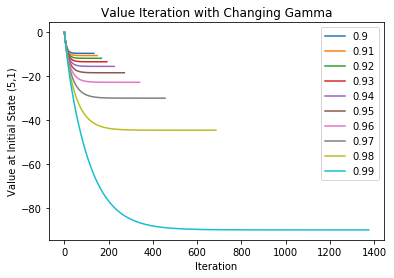

In [6]:
def initialize_plot():
    plt.plot()
    plt.ylabel('Value at Initial State (5,1)')
    plt.xlabel('Iteration')
    plt.title("Value Iteration with Changing Gamma")    
    return plt


# run value iteration code here
gridworld = Gridworld()
value = {}
init_vals= {}
plt = initialize_plot()
gammaRange = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for gamma in gammaRange:
    value = ValueIteration(gridworld, gamma)
    value.value_iteration()

    #create plot
    V = value.get_V()
    init_vals[gamma] = [V[v][(5,1)] for v in V]
    plt.plot(init_vals[gamma], label = gamma)

plt.legend()
plt.show()

In [91]:
pd.DataFrame.from_dict(value.get_V(), orient='index')

1                                       2                      \
            1         3         4         5         1         3         4   
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   -1.000000 -1.000000  5.500000 -1.000000 -1.000000  5.500000 -1.000000   
2   -1.900000 -1.900000  6.062500 -0.437500 -1.900000  6.062500  1.025000   
3   -2.710000 -2.710000  6.568750 -0.260312 -2.710000  6.568750  0.873125   
4   -3.439000 -3.439000  6.506102 -0.026805 -3.439000  6.432063  1.180672   
5   -4.095100 -4.095100  6.449718  0.033423 -4.078441  6.309044  1.057653   
6   -4.681842 -4.685590  6.275281  0.053894 -4.642694  6.067139  1.014404   
7   -5.204849 -5.217031  6.098048  0.006537 -5.139557  5.835931  0.870905   
8   -5.669674 -5.695328  5.895653 -0.069671 -5.579144  5.588565  0.736822   
9   -6.082337 -6.125795  5.695182 -0.172628 -5.968625  5.352870  0.579259   
10  -6.448518 -6.513216  5.494604 -0.288670 -6.314623  5.124252  0.423984   
11  -6.773540 -6.861894  5.301258 -0.413303 -6.622444  4.908972  0.266539   
12  -7.062189 -7.175705  5.115835 -0.540799 -6.896737  4.706264  0.113845   
13  -7.318744 -7.458134  4.940465 -0.668174 -7.141440  4.517331 -0.033935   
14  -7.546976 -7.712321  4.775550 -0.792821 -7.359989  4.341734 -0.174696   
15  -7.750206 -7.941089  4.621535 -0.913174 -7.555361  4.179309 -0.308027   
16  -7.931345 -8.146980  4.478330 -1.028097 -7.730162  4.029470 -0.433339   
17  -8.092945 -8.332282  4.345731 -1.136928 -7.886675  3.891638 -0.550557   
18  -8.237239 -8.499054  4.223342 -1.239289 -8.026908  3.765120 -0.659684   
19  -8.366191 -8.649148  4.110696 -1.335037 -8.152629  3.649220 -0.760914   
20  -8.481520 -8.784233  4.007259 -1.424191 -8.265401  3.543221 -0.854514   
21  -8.584741 -8.905810  3.912472 -1.506890 -8.366605  3.446421 -0.940825   
22  -8.677187 -9.015229  3.825763 -1.583351 -8.457467  3.358137 -1.020224   
23  -8.760031 -9.113706  3.746566 -1.653850 -8.539075  3.277712 -1.093116   
24  -8.834313 -9.202336  3.674326 -1.718696 -8.612396  3.204523 -1.159912   
25  -8.900950 -9.282102  3.608511 -1.778219 -8.678291  3.137979 -1.221023   
26  -8.960757 -9.353892  3.548613 -1.832756 -8.737528  3.077527 -1.276855   
27  -9.014455 -9.418503  3.494150 -1.882645 -8.790793  3.022651 -1.327798   
28  -9.062685 -9.476652  3.444671 -1.928217 -8.838699  2.972869 -1.374229   
29  -9.106020 -9.528987  3.399754 -1.969794 -8.881792  2.927736 -1.416503   
..        ...       ...       ...       ...       ...       ...       ...   
104 -9.495337 -9.999826  2.975428 -2.373300 -9.271112  2.504204 -1.822698   
105 -9.495353 -9.999843  2.975411 -2.373316 -9.271127  2.504187 -1.822714   
106 -9.495367 -9.999859  2.975396 -2.373332 -9.271141  2.504172 -1.822729   
107 -9.495379 -9.999873  2.975382 -2.373345 -9.271154  2.504158 -1.822743   
108 -9.495391 -9.999886  2.975370 -2.373357 -9.271165  2.504146 -1.822755   
109 -9.495401 -9.999897  2.975359 -2.373369 -9.271175  2.504135 -1.822766   
110 -9.495410 -9.999907  2.975349 -2.373378 -9.271185  2.504125 -1.822776   
111 -9.495418 -9.999917  2.975339 -2.373387 -9.271193  2.504116 -1.822785   
112 -9.495426 -9.999925  2.975331 -2.373395 -9.271201  2.504107 -1.822793   
113 -9.495433 -9.999932  2.975324 -2.373403 -9.271207  2.504100 -1.822800   
114 -9.495439 -9.999939  2.975317 -2.373409 -9.271213  2.504094 -1.822807   
115 -9.495444 -9.999945  2.975312 -2.373415 -9.271219  2.504088 -1.822813   
116 -9.495449 -9.999951  2.975306 -2.373420 -9.271224  2.504082 -1.822818   
117 -9.495453 -9.999956  2.975301 -2.373425 -9.271228  2.504078 -1.822823   
118 -9.495457 -9.999960  2.975297 -2.373429 -9.271232  2.504073 -1.822827   
119 -9.495461 -9.999964  2.975293 -2.373433 -9.271236  2.504069 -1.822831   
120 -9.495464 -9.999968  2.975290 -2.373437 -9.271239  2.504066 -1.822834   
121 -9.495467 -9.999971  2.975286 -2.373440 -9.271242  2.504063 -1.822837   
122 -9.495470 -9.999974  2.975284 -2.373443 -9.271245  2.504060 -1.822840   
123 -9.4

In [92]:
pd.DataFrame.from_dict(value.get_pi(), orient='index')

1           2           3              4     5            
     1  3  4  5  1  3  4  5  1  2  3  4  5  1  5  1  2  3  4  5
0    U  U  L  U  U  U  U  U  U  U  U  U  U  U  U  U  U  U  U  U
1    U  U  L  L  U  U  U  U  U  U  U  U  U  U  U  U  U  U  U  U
2    U  U  L  L  U  U  U  L  U  R  U  U  U  U  U  U  U  U  U  U
3    U  U  L  L  U  U  U  L  R  R  U  U  U  U  U  U  U  U  U  U
4    U  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  U  U  U  U
5    D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  U  U  U  U
6    D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  U  R  U
7    D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
8    D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
9    D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
10   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
11   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
12   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
13   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
14   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
15   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
16   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
17   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
18   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
19   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
20   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
21   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
22   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
23   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
24   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
25   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
26   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
27   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
28   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
29   D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
..  .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. ..
103  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
104  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
105  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
106  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
107  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
108  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
109  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
110  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
111  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
112  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
113  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
114  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
115  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
116  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
117  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
118  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
119  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
120  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
121  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
122  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
123  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
124  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
125  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
126  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
127  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
128  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
129  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
130  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
131  D  U  L  L  D  U  U  L  R  R  U  U  U  U  U  U  L  R  R  U
132  D  U  L  L  D  U  U  L  R  R  U 

## Policy Iteration
* [15 points] Part C - Solving using Policy Iteration: Now, you are asked to implement the policy iteration algorithm to solve the Gridworld domain. As in Part II, you are once again provided with a template to help you structure your implementation.

In [7]:
# Jade
class PolicyIteration :
    
    def __init__(self, gridworld , gamma):
        # initialize the domain and discount factor
        self. gridworld = gridworld
        self. gamma = gamma
        self.k = 0 # policy iteration numbers
        self.V = {}  # value matrix
        self.pi = {}
        self.p = 0
    
    def initialize_policy(self):
        # policy iteration also requires to maintain a policy
        # initialize the policy pi_0 [s] = 0 ( LEFT ) for all states and the value function V_0[s] = 0
        # implement the policy (self.pi) as a dictionary that maps states to actions in {LEFT , UP , RIGHT , DOWN }
        self.pi[self.k] = {key: 'L' for key in self.gridworld.states()}
        
    def initialize_values(self):
        # you can use the corresponding procedure you defined in ValueIteration
        self.V[self.k] = {key: 0.0 for key in self.gridworld.states()} 
        
#    def compute_backup(self, state , action ):
#        # you can use the corresponding procedure you defined in ValueIteration
#        # E{R(s, a, S ') + gamma * V_k[S ']} in value iteration 
#        next_state = self.gridworld.next_state(state, action)
#        V_s = self.V[self.k][next_state]
#        p = self.gridworld.pr(state,action,next_state)
#        R_s = self.gridworld.reward(state, action, next_state)
#        return R_s + self.gamma*p*V_s
    
    def compute_backup(self, state, action):
        # use this as a helper function to return the necessary quantity 
        # E{R(s, a, S ') + gamma * V_k[S ']} in value iteration 
        next_state = self.gridworld.next_state(state, action)
        V_s = self.V[self.k][next_state]
        p = self.gridworld.pr(state,action,next_state) - self.p       # updated for windy
        R_s = self.gridworld.reward(state, action, next_state)
        backup = p*(R_s + self.gamma*V_s)
        
        if self.p > 0:
            next_state_windy = self.gridworld.next_state(state, 'D')
            V_s_windy = self.V[self.k][next_state]                             #updated for windy
            R_s_windy = self.gridworld.reward(state, 'D', next_state_windy)
            backup = backup + (1-p)*(R_s_windy + self.gamma*V_s_windy)
        
        return backup 
    
    def greedy_action(self, state ):
        # use the previous function compute_backup to return the (
        # deterministic ) greedy action a* = pi[s] derived from V
        V_temp = {}
        for action in self.gridworld.actions():
            V_temp[action]=self.compute_backup(state, action)
        
        # if more than one action have the max value, select randomly from those top actions
        top = max(V_temp.values())
        topmoves = [k for k, v in V_temp.items() if v == top]
        greedy_a = random.choice(topmoves)
        return greedy_a
    
    def policy_evaluation_step(self, state ):
        # use this function to implement the policy evaluation step for one iteration 
        #, e.g. return the value V_{k +1}[ s] = E[R(s, pi[s], S ') + gamma * V_k[S ']]
        action = self.pi[self.k][state]
        V_new = self.compute_backup(state, action)
        # you should not modify self.V
        return V_new
    
    def policy_evaluation(self, tolerance =1e-6) :
        # in policy evaluation , we solve V = P * (R + gamma * V) for a fixed policy by iterating 
            # V_{k +1}[ s] = E[R(s, pi[s], S ') + gamma * V_k[S ']] for each state s until V_k converges uniformly           
        # use this method to perform the necessary iterations until 
            # V_k[s] (self.V) converges to within the specified tolerance
        # this procedure should not return a value , but should modify self.V
        V_old = self.V[self.k]
        while True:
            delta = 0
            V_new = {}
            for state in self.gridworld.states():
                V_new[state] = self.policy_evaluation_step(state)
                delta = max(delta, abs(V_new[state] - V_old[state]))        
            if delta < tolerance:
                break
            else:
                V_old = V_new
        self.V[self.k+1] = V_new
        
    def policy_improvement(self):
        # implement the procedure here for policy improvement , 
        # e.g. pi_{k +1}[ s] = argmax_a E[R(s, a, S ') + gamma * V_k[S']]
        pi_new = {}
        improvement = False    #the opposite of "stable" is "improvement", which is more intuitive given the function name
        
        for state in self.gridworld.states():
            pi_new[state] = self.greedy_action(state)
            if pi_new[state] != self.pi[self.k][state]:
                improvement = True
        self.pi[self.k + 1] = pi_new
        return improvement
        
    
    def policy_iteration(self, tolerance =1e-6):
        # implement the complete policy iteration algorithm using the procedures you defined earlier
        # your method should include: 
        
        # initialization of the policy and value function 
        self.initialize_policy()
        self.initialize_values()
        
        # perform each iteration of policy iteration 
            # which includes policy evaluation followed by improvement, until the policy no longer improves
        improving = True
        while improving: 
            self.policy_evaluation()
            improving = self.policy_improvement()
            self.k = self.k + 1
        
        # you should perform monitoring and plotting the value function at the initial state , 
            # like you did for value iteration
            
        return
            
            
    def set_p(self,p):
        self.p = p
        
    def get_V(self):
        return self.V # value grid
    
    def get_k(self):
        return self.k # number of iterations
    
    def get_pi(self):
        return self.pi # best policy        

### Run Policy Iteration
Please provide a complete algorithm in your report. Please provide a similar analysis for policy iteration as you have already done for value iteration. In total, you need to run each algorithm four times to cover all the choices of gamma and p.
Your report should follow the same format as Section 1 and answer the same questions. You are allowed to use your implementations of value and policy iteration for this part.

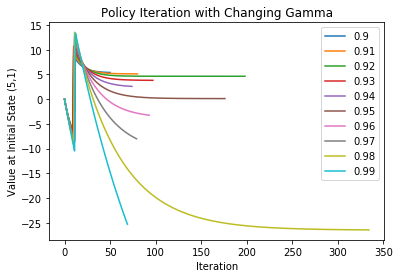

In [8]:
def initialize_plot():
    plt.plot()
    plt.ylabel('Value at Initial State (5,1)')
    plt.xlabel('Iteration')
    plt.title("Policy Iteration with Changing Gamma")
    
    return plt

# run policy iteration code here
gridworld = Gridworld()
init_vals= {}
plt = initialize_plot()
gammaRange = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for gamma in gammaRange:
    policy = PolicyIteration(gridworld, gamma)
    policy.policy_iteration()

    #create plot
    V = policy.get_V()
    init_vals[gamma] = [V[v][(5,1)] for v in V]
    plt.plot(init_vals[gamma], label = gamma)

plt.legend()
plt.show()

# The Windy Gridworld
The windy Gridworld domain is very similar to the deterministic Gridworld. However, whenever the robot is instructed to take an action, there is a probability p IN [0, 1] that the robot will actually move to the cell directly below the current cell it occupies, regardless of the action it is given, and a probability 1-p that the robot will move according to the action it is given.

### Run Value Iteration in Windy Gridworld
Generating two plots:
* the first compares Gamma, then the best Gamma is selected for the second plot
* the second plot compares p values

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


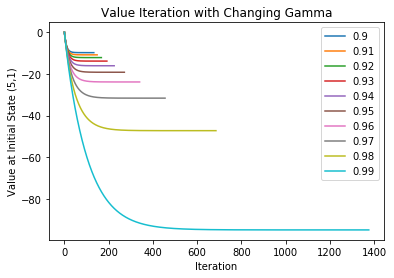

In [9]:
def initialize_plot():
    plt.plot()
    plt.ylabel('Value at Initial State (5,1)')
    plt.xlabel('Iteration')
    plt.title("Value Iteration with Changing Gamma")    
    return plt


# run value iteration code here
gridworld = Gridworld()
value = {}
init_vals= {}
plt = initialize_plot()
p = 0.5

#gamma = 0.9
gammaRange = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for gamma in gammaRange:
    value = ValueIteration(gridworld, gamma)
    value.set_p(p)                              #add wind (stochasticity)
    value.value_iteration()
    
    #create plot
    V = value.get_V()
    init_vals[gamma] = [V[v][(5,1)] for v in V]
    plt.plot(init_vals[gamma], label = gamma)

plt.legend()
plt.show()

0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


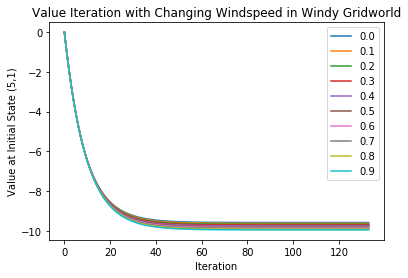

In [14]:
def initialize_plot():
    plt.plot()
    plt.ylabel('Value at Initial State (5,1)')
    plt.xlabel('Iteration')
    plt.title("Value Iteration with Changing Windspeed in Windy Gridworld")    
    return plt


# run value iteration code here
gridworld = Gridworld()
value = {}
init_vals= {}
plt = initialize_plot()
gamma = 0.9

pRange = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in pRange:
    value = ValueIteration(gridworld, gamma)
    value.set_p(p)                              #add wind (stochasticity)
    value.value_iteration()
    
    #create plot
    V = value.get_V()
    init_vals[p] = [V[v][(5,1)] for v in V]
    plt.plot(init_vals[p], label = p)

plt.legend()
plt.show()

### Run Policy Iteration in Windy Gridworld

Generating two plots:
* the first compares Gamma, then the best Gamma is selected for the second plot
* the second plot compares p values


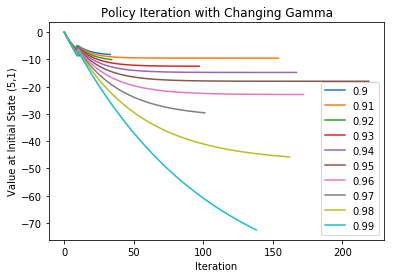

In [10]:
def initialize_plot():
    plt.plot()
    plt.ylabel('Value at Initial State (5,1)')
    plt.xlabel('Iteration')
    plt.title("Policy Iteration with Changing Gamma")
    
    return plt

# run policy iteration code here
gridworld = Gridworld()
init_vals= {}
plt = initialize_plot()
p = 0.9

gammaRange = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for gamma in gammaRange:
    policy = PolicyIteration(gridworld, gamma)
    policy.set_p(p)      #add wind (stochasticity)
    policy.policy_iteration()

    #create plot
    V = policy.get_V()
    init_vals[gamma] = [V[v][(5,1)] for v in V]
    plt.plot(init_vals[gamma], label = gamma)

plt.legend()
plt.show()

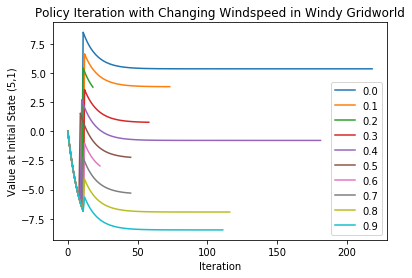

In [13]:
def initialize_plot():
    plt.plot()
    plt.ylabel('Value at Initial State (5,1)')
    plt.xlabel('Iteration')
    plt.title("Policy Iteration with Changing Windspeed in Windy Gridworld")
    
    return plt

# run policy iteration code here
gridworld = Gridworld()
init_vals= {}
plt = initialize_plot()
gamma = 0.9

pRange = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for p in pRange:
    policy = PolicyIteration(gridworld, gamma)
    policy.set_p(p)      #add wind (stochasticity)
    policy.policy_iteration()

    #create plot
    V = policy.get_V()
    init_vals[p] = [V[v][(5,1)] for v in V]
    plt.plot(init_vals[p], label = p)

plt.legend()
plt.show()